In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty-bank-stock-prices/PNB.NS.csv
/kaggle/input/nifty-bank-stock-prices/HDFC.NS.csv
/kaggle/input/nifty-bank-stock-prices/ind_niftybanklist.csv
/kaggle/input/nifty-bank-stock-prices/AXISBANK.NS.csv
/kaggle/input/nifty-bank-stock-prices/FEDERALBNK.NS.csv
/kaggle/input/nifty-bank-stock-prices/ICICIBANK.NS.csv
/kaggle/input/nifty-bank-stock-prices/SBIN.NS.csv
/kaggle/input/nifty-bank-stock-prices/KOTAKBANK.NS.csv
/kaggle/input/nifty-bank-stock-prices/NSEBANK (1).csv
/kaggle/input/nifty-bank-stock-prices/IDFCFIRSTB.NS.csv
/kaggle/input/nifty-bank-stock-prices/BANDHANBNK.NS.csv
/kaggle/input/nifty-bank-stock-prices/AUBANK.NS.csv
/kaggle/input/nifty-bank-stock-prices/INDUSINDBK.NS.csv
/kaggle/input/nifty-bank-stock-prices/RBLBANK.NS.csv


In [11]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00a 0:00:01


In [7]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/nifty-bank-stock-prices/AUBANK.NS.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,900.849976,904.500000,873.500000,899.450012,899.450012,564393
1,2021-01-12,895.500000,908.000000,894.950012,904.849976,904.849976,472697
2,2021-01-13,908.950012,908.950012,884.150024,892.500000,892.500000,730301
3,2021-01-14,896.400024,931.500000,896.400024,914.000000,914.000000,1015700
4,2021-01-15,914.000000,921.900024,907.250000,920.250000,920.250000,1411827


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       122 non-null    object 
 1   Open       122 non-null    float64
 2   High       122 non-null    float64
 3   Low        122 non-null    float64
 4   Close      122 non-null    float64
 5   Adj Close  122 non-null    float64
 6   Volume     122 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.8+ KB


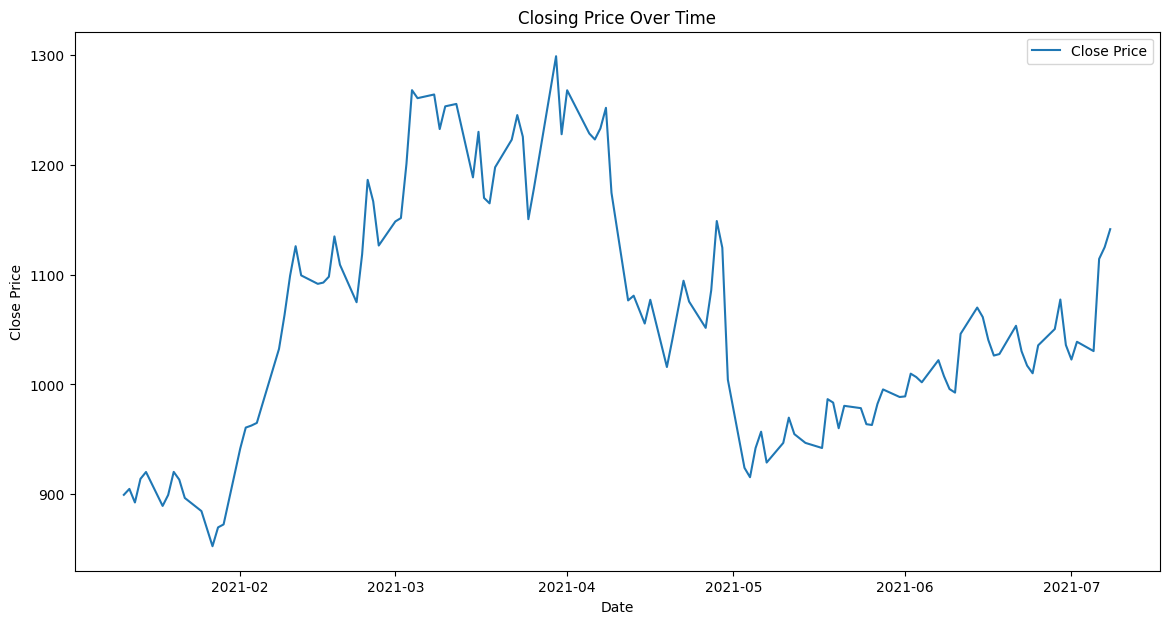

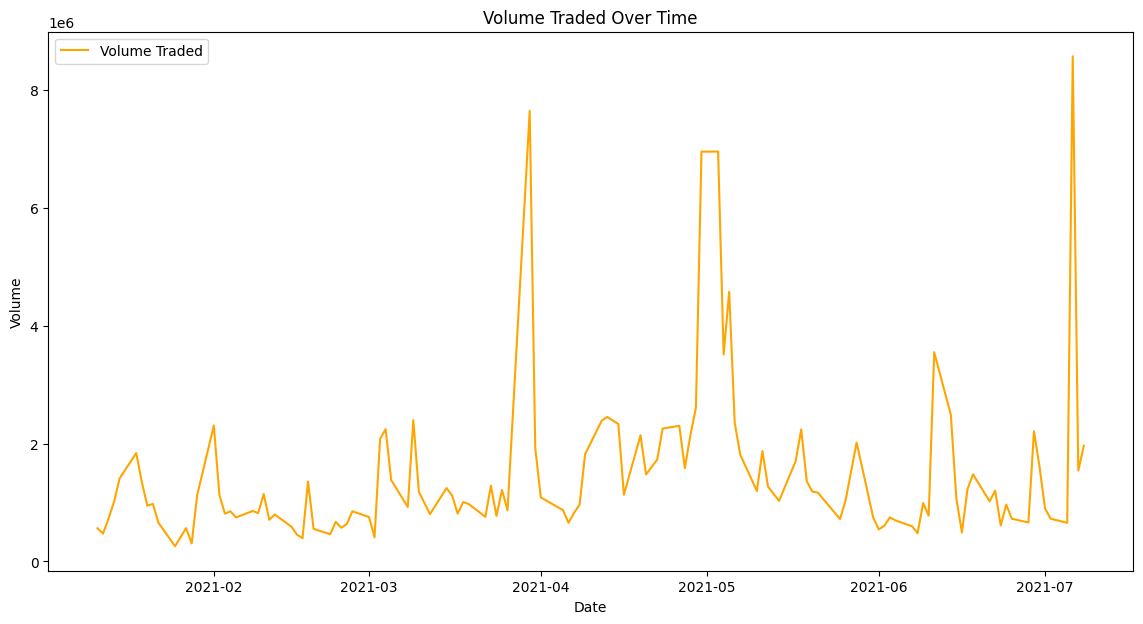

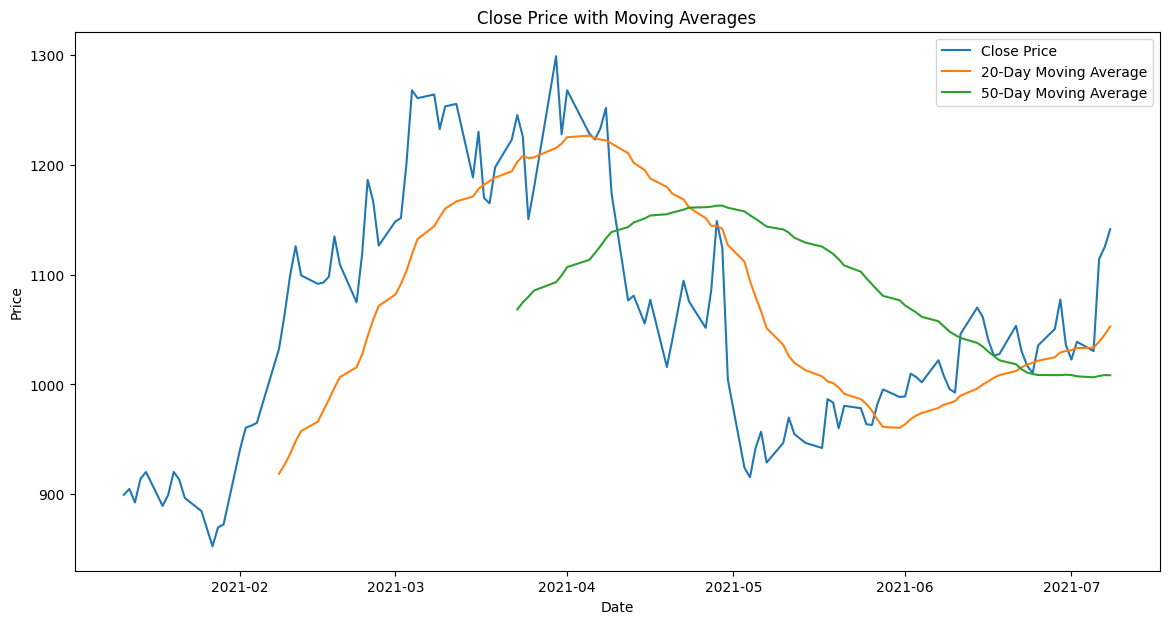

(              Open         High          Low        Close    Adj Close  \
 count   122.000000   122.000000   122.000000   122.000000   122.000000   
 mean   1058.315164  1081.439343  1034.000410  1058.166804  1058.166804   
 std     111.526313   118.015518   104.241366   111.307948   111.307948   
 min     866.000000   877.000000   842.500000   852.650024   852.650024   
 25%     970.000000   989.474976   958.924988   971.912506   971.912506   
 50%    1041.000000  1064.449951  1020.899994  1040.900024  1040.900024   
 75%    1134.750000  1158.887512  1106.674988  1139.750030  1139.750030   
 max    1280.000000  1354.400024  1242.900024  1298.900024  1298.900024   
 
              Volume        20_MA        50_MA  
 count  1.220000e+02   103.000000    73.000000  
 mean   1.449015e+06  1072.041918  1088.920673  
 std    1.341885e+06    91.650961    54.946204  
 min    2.589280e+05   918.677496  1006.480000  
 25%    7.431898e+05   997.018750  1037.800999  
 50%    1.032194e+06  1036.02

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date column as index
data.set_index('Date', inplace=True)

# Basic Analysis
summary_stats = data.describe()
missing_values = data.isnull().sum()

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Volume Traded', color='orange')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Moving Averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['20_MA'], label='20-Day Moving Average')
plt.plot(data['50_MA'], label='50-Day Moving Average')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Perform the basic analysis and display the results

# Summary statistics
summary_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Display the summary statistics and missing values
summary_stats, missing_values


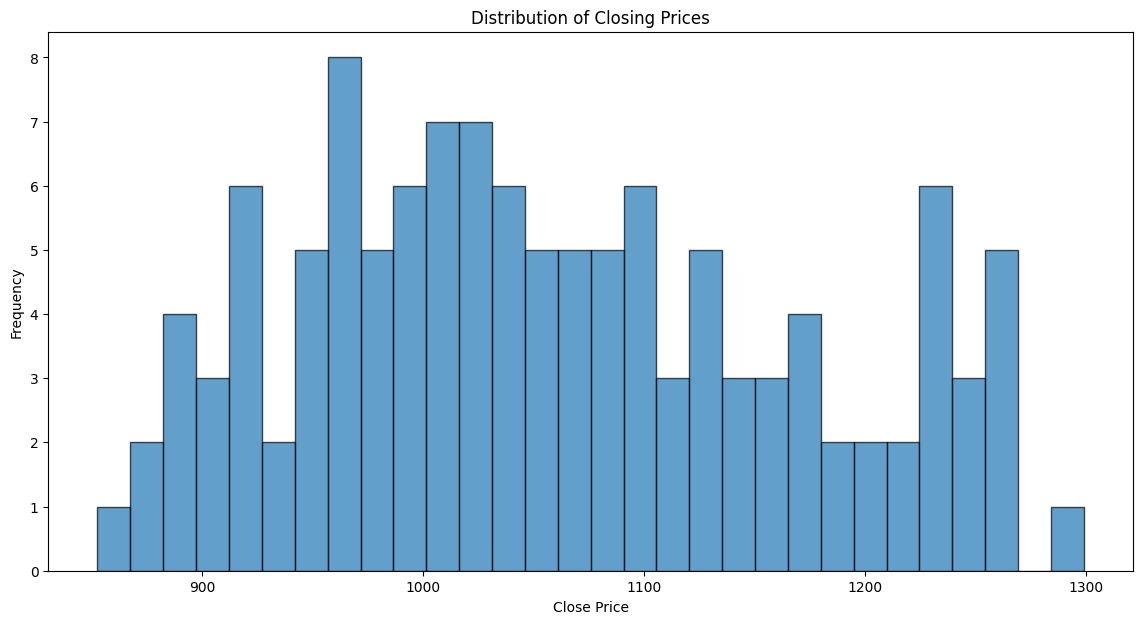

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


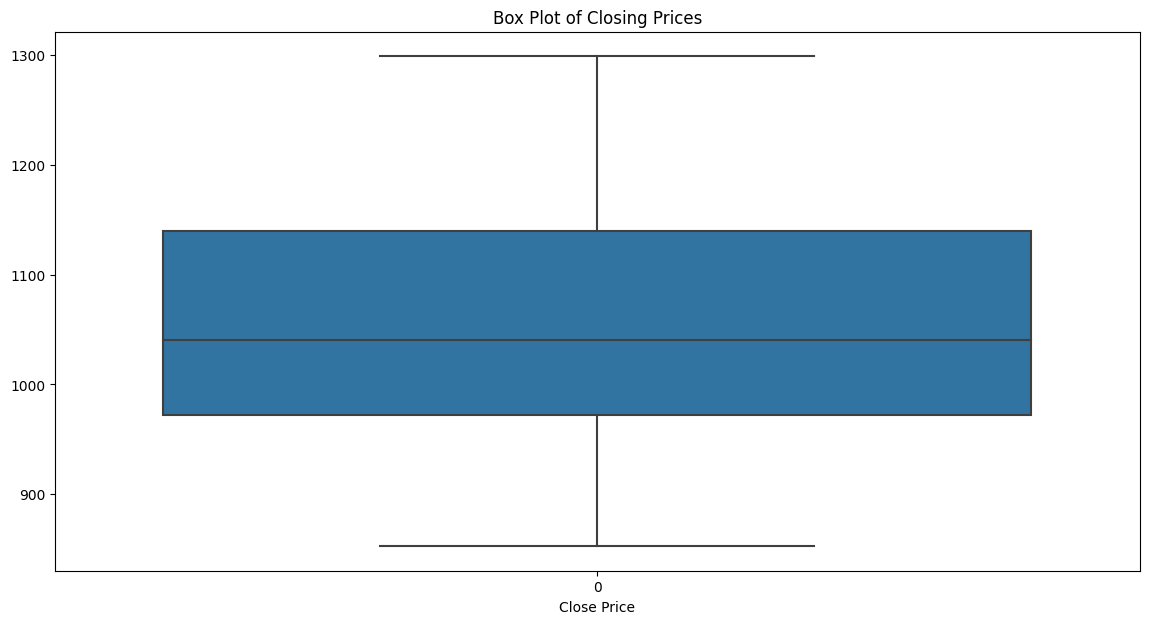

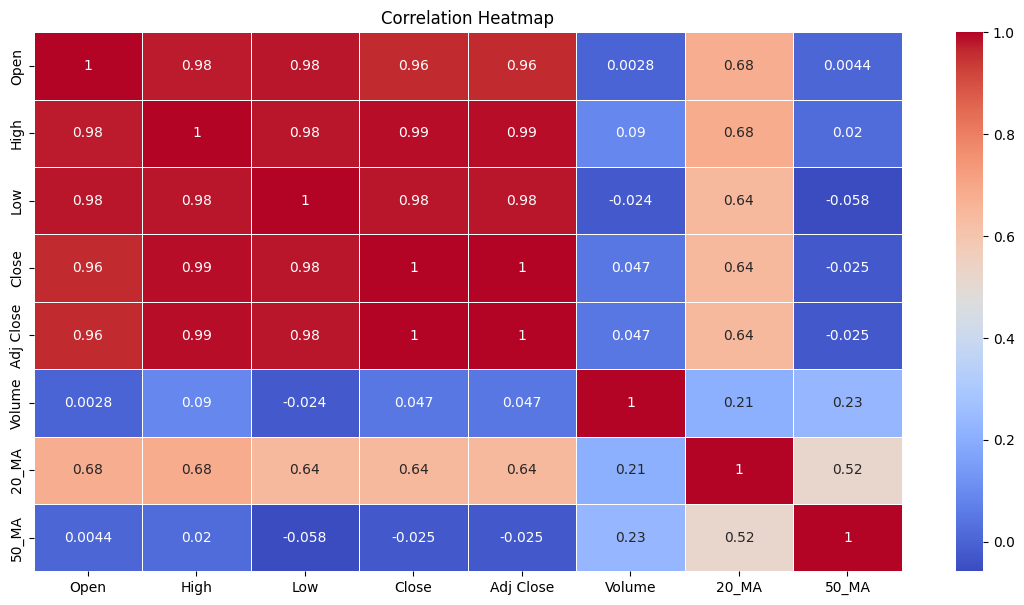

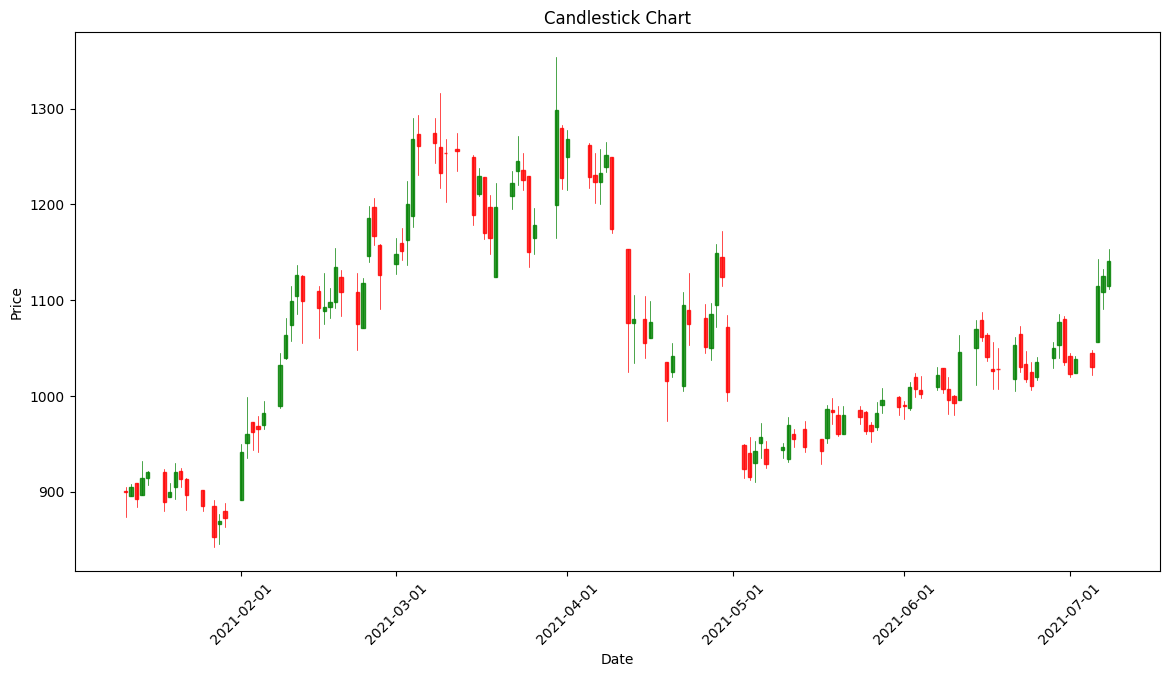

In [12]:
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Histogram of Closing Prices
plt.figure(figsize=(14, 7))
plt.hist(data['Close'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Closing Prices
plt.figure(figsize=(14, 7))
sns.boxplot(data['Close'])
plt.title('Box Plot of Closing Prices')
plt.xlabel('Close Price')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 7))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Prepare data for Candlestick Chart
ohlc = data[['Open', 'High', 'Low', 'Close']].copy()
ohlc.reset_index(inplace=True)
ohlc['Date'] = ohlc['Date'].map(mdates.date2num)

# Candlestick Chart
fig, ax = plt.subplots(figsize=(14, 7))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r', alpha=0.8)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_title('Candlestick Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(7)

# Load the dataset
file_path = '/kaggle/input/nifty-bank-stock-prices/AUBANK.NS.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the closing prices
closing_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Create the dataset with sequences
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Define the time step
time_step = 10

# Create the dataset
X, y = create_dataset(scaled_data, time_step)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape the input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=20)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1056
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0222
Epoch 15/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143
Epoch 16/20
74/74 ━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


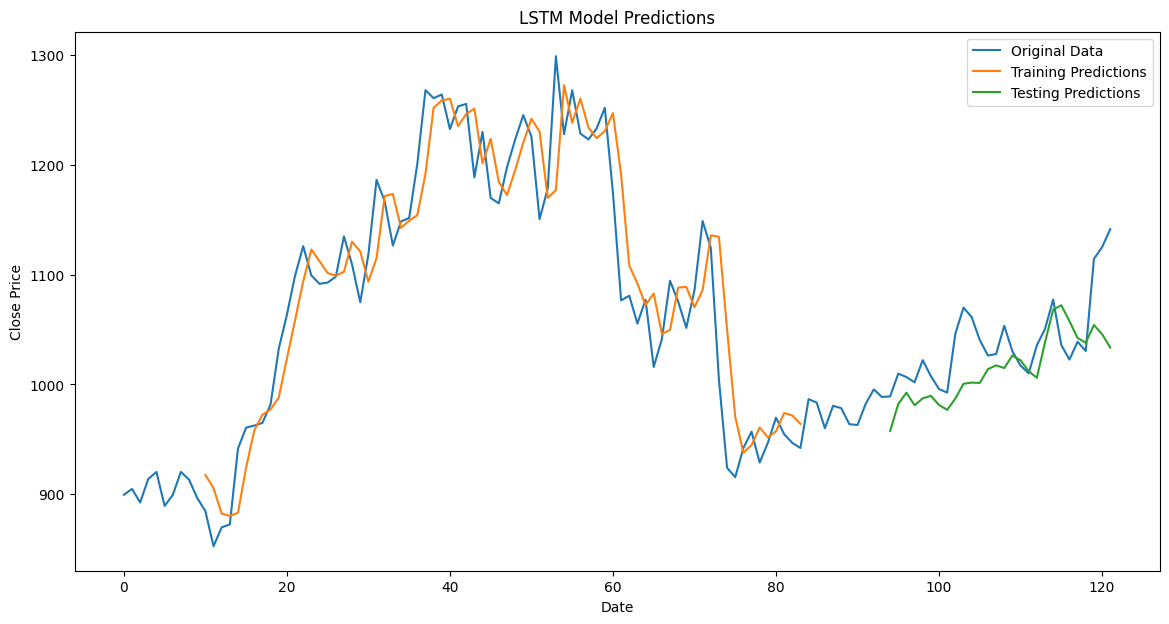

Training RMSE: 1107.8616957850475
Testing RMSE: 1023.8111861888926


In [26]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_score = np.sqrt(mean_squared_error(y_train, train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test, test_predict[:, 0]))

# Prepare the data for plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan

# Ensure the indices match correctly
test_plot_start = len(train_predict) + (time_step * 2)
test_plot_end = test_plot_start + len(test_predict)

# Handle the case where the end index exceeds the array length
if test_plot_end > len(scaled_data):
    test_plot_end = len(scaled_data)

test_plot[test_plot_start:test_plot_end, :] = test_predict[:test_plot_end - test_plot_start]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(train_plot, label='Training Predictions')
plt.plot(test_plot, label='Testing Predictions')
plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

print(f'Training RMSE: {train_score}')
print(f'Testing RMSE: {test_score}')
